In [ ]:
pip install dlib

In [ ]:
pip install cmake

In [137]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Thankfully the following resources are taken from generous contributions with ❤️:
### Face image taken from collection of Anastasia Shuraeva from Pexels
### Jewel image taken from https://pngset.com/download-free-png-cqknn
### shape_predictor_68_face_landmarks.dat model is taken from https://github.com/italojs/facial-landmarks-recognition/blob/master/shape_predictor_68_face_landmarks.dat


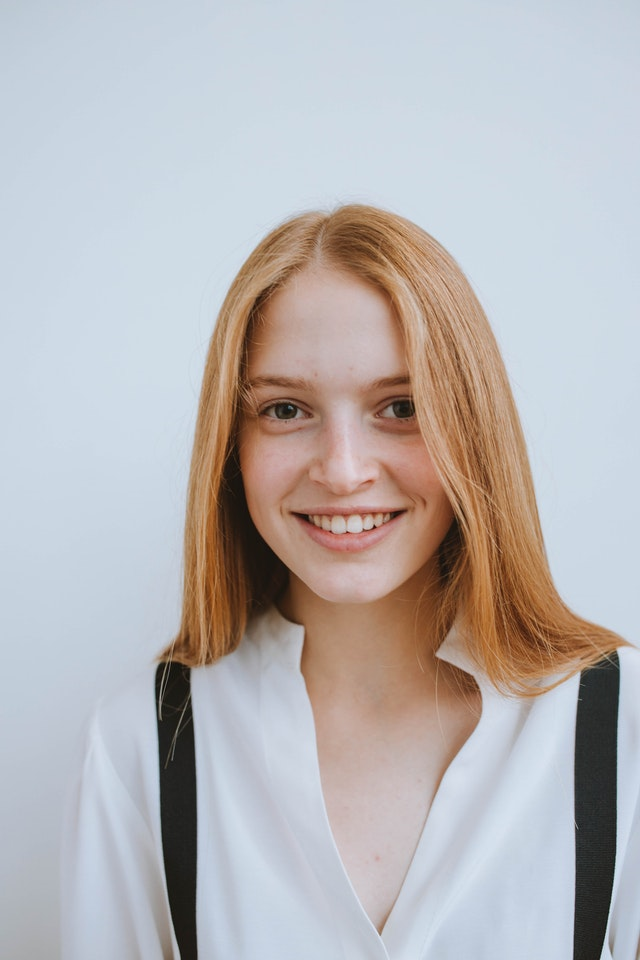

In [146]:
import cv2
from google.colab.patches import cv2_imshow
import dlib
import numpy as np


# Load the detector
detector = dlib.get_frontal_face_detector()

# Load the predictor
predictor = dlib.shape_predictor("/content/gdrive/MyDrive/GSSOC_Face-X/shape_predictor_68_face_landmarks.dat")


# read the face image
img_original = cv2.imread("/content/gdrive/MyDrive/GSSOC_Face-X/face.jpg")
jewel=cv2.imread("/content/gdrive/MyDrive/GSSOC_Face-X/jewel.png",cv2.IMREAD_UNCHANGED)

# show the face image
cv2_imshow(img_original)

In [183]:
def create_cropped_portion(img, points):
        bounding_rect = cv2.boundingRect(points)
        x,y,w,h = bounding_rect
        imgCrop = img[y:y+h,x:x+w]
        imgCrop = cv2.resize(imgCrop,(0,0),None,5,5)
        return imgCrop

nose :  (410, 540, 3)
(960, 640, 3)
dim :  (5, 10)
Resized Dimensions :  (10, 5, 4)


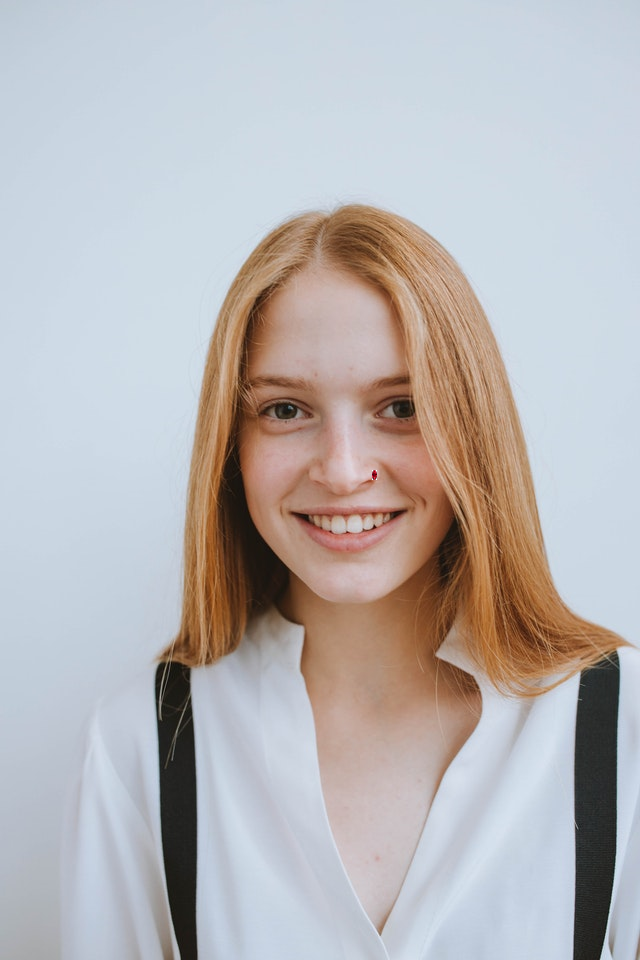

In [182]:
img=img_original

# Convert image into grayscale
gray_img = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)

# Use detector to find landmarks
faces = detector(gray_img)

for face in faces:
    # Create landmark object
    landmarks = predictor(image=gray_img, box=face)
    facepoints = []
    # Loop through all the points
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        facepoints.append([x,y])

    facepoints = np.array(facepoints)
    jewelpoint=35
    linear_size=3
    nose_stud_area = create_cropped_portion(img,facepoints[jewelpoint:jewelpoint+linear_size])
    print("nose : ",nose_stud_area.shape)

    #scale down the jewellary image to fit above dimension
    width = int(nose_stud_area.shape[1])
    height = int(nose_stud_area.shape[0])

    if(width<height):
      min=width
    else:
      min=height

    #get the ratio between minimum dimension of nose stud_area to image width
    ratio=int(min/img.shape[1])

    #xbar,ybar represent the width and height of scaled image of jewel
    xbar=ratio*jewel.shape[1]
    ybar=ratio*jewel.shape[0]

    #fix for zero or less than zero outcomes for size
    if(xbar==0 and ybar==0):
      if(jewel.shape[1]>jewel.shape[0]):
        xbar=10;
        ybar=5
      else:
        xbar=5
        ybar=10
    elif(xbar<=0):
      xbar=5
    elif(ybar<=0):
      ybar=5
    
    dim = (xbar,ybar)
    print("dim : ",dim)

    # resize image
    resized = cv2.resize(jewel, dim, interpolation = cv2.INTER_AREA)
    print('Resized Dimensions : ',resized.shape)
    
    #x dimension of jewel on the image
    dimx=facepoints[jewelpoint][0];

    #y dimension taking little bit up from the edge point
    dimy=facepoints[jewelpoint][1]-15;

    #make the image a 4-channel, to merge with our initial 4 channel gif  
    b_channel, g_channel, r_channel = cv2.split(img)

    alpha_channel = np.ones(b_channel.shape, dtype=b_channel.dtype) * 255 #creating a alpha channel image.

    imgJewelled = cv2.merge((b_channel, g_channel, r_channel, alpha_channel))

    imgJewelled[dimy:(dimy+ybar),dimx:dimx+xbar] = resized
   

# show the face with nose-stud
cv2_imshow(imgJewelled)